In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
from __future__ import division
import sys
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
sys.path.append('/data/mfmtk-utils/')
from mfmtkutils import *

In [57]:
cat = catalog('/data/catalogs/DATA_CERTA.MFMTK')
galaxies = cat.raw_catalog[0]
data = cat.param_selection(['Mo', 'A1', 'A3', 'S1', 'H', 'G', 'sigma_psi'])
data[0]

array([  6.22000000e+02,   1.52470000e-01,   9.00820000e-01,
         2.36610000e-01,   3.84570000e-01,   7.60810000e-01,
         1.79980000e-01])

In [59]:
zs[0]

array(['PGC000212', '0.03746'], 
      dtype='|S9')

In [72]:
zs = np.loadtxt('/data/data_tables/EFIGI_NED.txt', usecols=[0, 2], dtype=str)

zgalaxies = []
for z in zs:
    name = 'PGC0' + z[0].split('PGC')[1]
    zgalaxies.append(name)
zgalaxies    

size = []
for i, galaxy in enumerate(galaxies):
    for j, zgalaxy in enumerate(zgalaxies):
        if galaxy == zgalaxy:
            if (float(zs[j][1]) > 0):
                size.append([data[i][0], float(zs[j][1])])

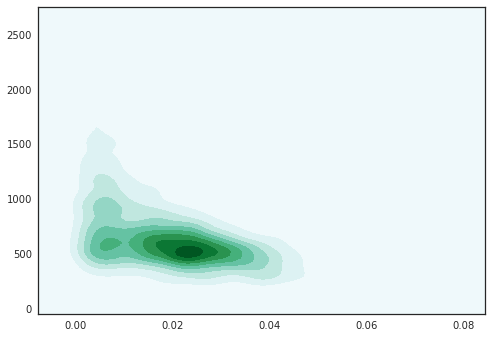

In [84]:
#size = np.array(size).T
import seaborn as sns; sns.set(style="white", color_codes=True)
sns.kdeplot(size[1], size[0], shade=True)
#plt.plot(size[1], size[0], '.', label=r'$\rm Galaxy \ in \  EFIGI$')
#plt.legend()

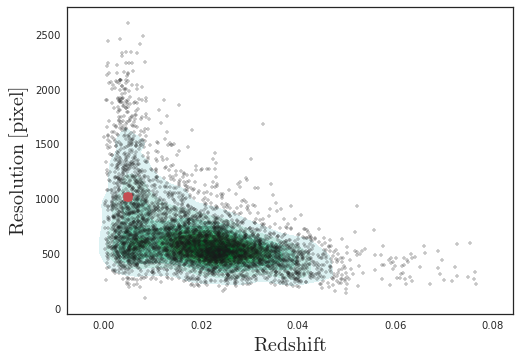

In [121]:
plt.plot(size[1], size[0], '.k', alpha=0.25)
plt.ylabel(r'$\rm Resolution \ [pixel]$', fontsize=20)
plt.xlabel(r'$\rm Redshift$', fontsize=20)
sns.kdeplot(size[1], size[0], shade=True, shade_lowest=False)
#plt.text(0.04, 1000, r'$\rm pixel \ scale = 0.4\'\'/pixel$', fontsize=15)
plt.plot(0.005, 1024, 'or',  ms=10)
plt.savefig('/home/lferreira/morfometryka-constraints-galaxy/images/res_z.png', dpi=300)

In [125]:
len(size[0][np.where(size[0]> 1500)])

199

In [128]:
len(size[1][np.where(size[1] < 0.01)])

1269